In [1]:
import os
import pandas as pd

# Since we have different excel sheets for each month, merge data from each month into one csv

In [2]:
path= "E:/Data_Analyst/Pandas_Project/SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]
all_months_data= pd.DataFrame()
for file in files:
    current_data= pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data,current_data])

all_months_data.to_csv("E:/Data_Analyst/Pandas_Project/SalesAnalysis/all_data.csv",index=False)

In [3]:
all_data = pd.read_csv("E:/Data_Analyst/Pandas_Project/SalesAnalysis/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning up data !

#### Drop NULL rows since very few NULLs are there

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
#check the data type of each column
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
#Remove rows having Order Date as value in "Order Date" column need to be removed to extract correct order month, year, hour etc.
all_data=all_data[all_data['Order Date'].str[0:2]!="Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
#Extracting month
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
#Change data type of Quantity ordered and Price to numeric to find out the total sales for the product
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [9]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [10]:
#Extract city and State from the address column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## DATA EXPLORATION:

### Task1: What was the best month for sales? What were the earnings in that month?

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [12]:
all_data.groupby(['Month']).sum().sort_values('Sales',ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


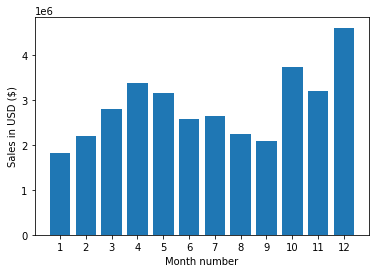

In [13]:
import matplotlib.pyplot as plt

months = range(1,13)
#print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [14]:
#As we saw, the best month for sales was December and the earnings were $4613443.

### Task2: Which city sold the highest number of product?

In [15]:
all_data.groupby(['City']).sum().sort_values('Sales',ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8211461.74,315520,8262203.91
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)', 'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)', 'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)']


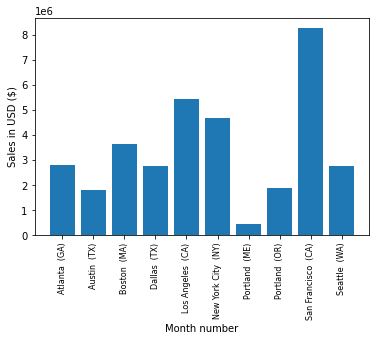

In [16]:
keys = [city for city, df in all_data.groupby(['City'])]
print(keys)
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [17]:
#The city selling the highest number of products is San Francisco (CA)

### Task3: When should the advertisements be displayed to maximize the likelihood of customer buying the product?

In [18]:
# Add hour column to find out the hour of day when the sales is highest
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
#all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


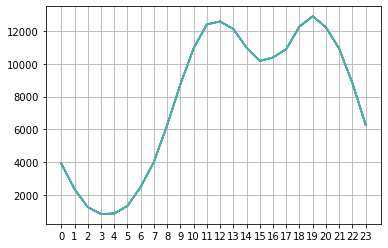

In [19]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count())
plt.xticks(keys)
plt.grid()
plt.show()

In [20]:
#The ad should be shown during morning around 10-11 AM and evening around 6-7 PM

### Task4: What products are most often sold together?

In [21]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(20)

C:\Users\andri\AppData\Local\Temp/ipykernel_404/1244471524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


### What products are sold the most and why?

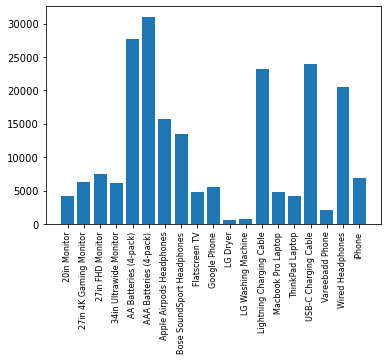

In [22]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\andri\AppData\Local\Temp/ipykernel_404/374612329.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\andri\AppData\Local\Temp/ipykernel_404/374612329.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


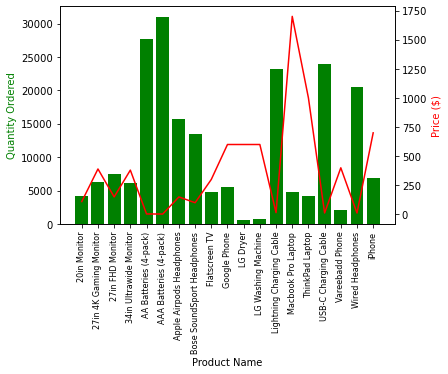

In [23]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [24]:
#It is found that the items having less price is sold the most , here AA and AAA batteries while the item having high price is sold less